In [183]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn plot stylings
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)s

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("data/smmh.csv", on_bad_lines='skip')

# Rename column names for readability and easier indexing
col_names_dict = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship',
    '4. Occupation Status': 'occupation',
    '5. What type of organizations are you affiliated with?': 'affiliate_organization',
    '6. Do you use social media?': 'social_media_use',
    '7. What social media platforms do you commonly use?': 'platforms',
    '8. What is the average time you spend on social media every day?': 'daily_usage',
    '9. How often do you find yourself using Social media without a specific purpose?': 'without_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'distracted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless',
    '12. On a scale of 1 to 5, how easily distracted are you?' : 'distracted_ease',
    '13. On a scale of 1 to 5, how much are you bothered by worries?' : 'worries',
    '14. Do you find it difficult to concentrate on things?' : 'concentration',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?' : 'compare_to_others',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?' : 'compare_feelings',
    '17. How often do you look to seek validation from features of social media?' : 'validation',
    '18. How often do you feel depressed or down?' : 'depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?' : 'daily_activity_flux',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?' : 'sleeping_issues'
}

df = df.rename(columns=col_names_dict).drop(columns=['timestamp', 'affiliate_organization', 'platforms'])

# General data info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  481 non-null    float64
 1   gender               481 non-null    object 
 2   relationship         481 non-null    object 
 3   occupation           481 non-null    object 
 4   social_media_use     481 non-null    object 
 5   daily_usage          481 non-null    object 
 6   without_purpose      481 non-null    int64  
 7   distracted           481 non-null    int64  
 8   restless             481 non-null    int64  
 9   distracted_ease      481 non-null    int64  
 10  worries              481 non-null    int64  
 11  concentration        481 non-null    int64  
 12  compare_to_others    481 non-null    int64  
 13  compare_feelings     481 non-null    int64  
 14  validation           481 non-null    int64  
 15  depressed            481 non-null    int

None

In [184]:
# Convert float age values to int values 

display(df['age'].dtype) # float64

df['age'] = df['age'].astype(int)

display(df['age'].dtype) # int32

dtype('float64')

dtype('int32')

In [185]:
# Clean gender column
display(df['gender'].value_counts())
print("\n")

df['gender'] = df['gender'].apply(lambda x: x if x in ["Male","Female"] else "Other")

display(df['gender'].value_counts())

gender
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64

gender
Female    263
Male      211
Other       7
Name: count, dtype: int64

In [186]:
# Checking for null values
print("Null Data Values:\n")
display(df.isnull().sum())

Null Data Values:



age                    0
gender                 0
relationship           0
occupation             0
social_media_use       0
daily_usage            0
without_purpose        0
distracted             0
restless               0
distracted_ease        0
worries                0
concentration          0
compare_to_others      0
compare_feelings       0
validation             0
depressed              0
daily_activity_flux    0
sleeping_issues        0
dtype: int64

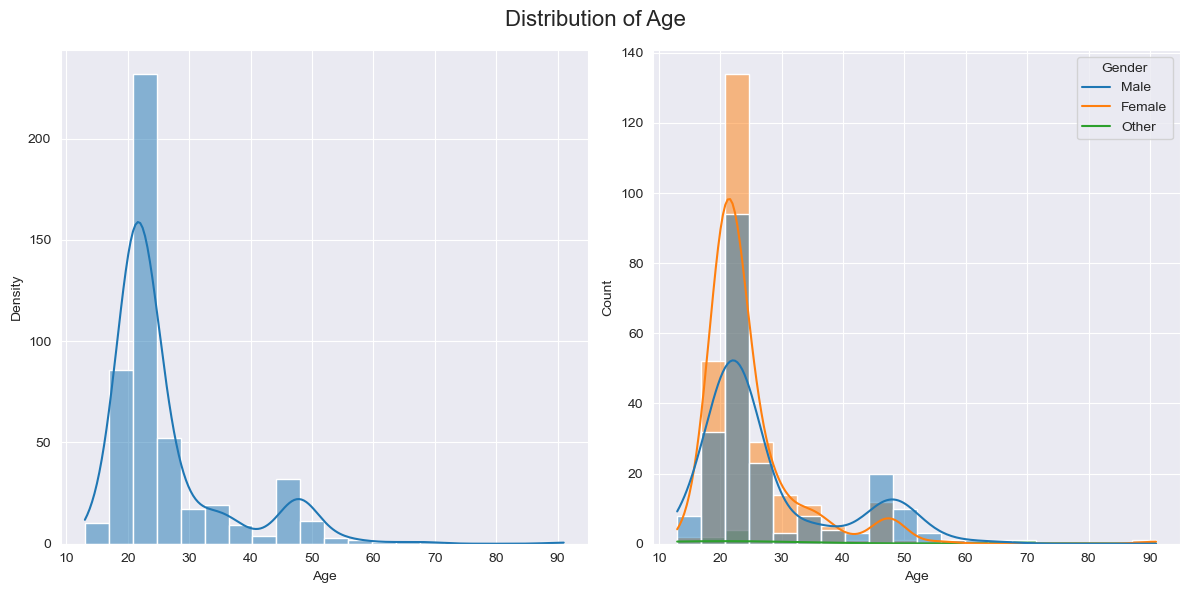

In [187]:
# Histogram Plot for age column
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.histplot(data=df, x="age", kde=True, bins=20, ax=ax[0])
sns.histplot(data=df, x="age", kde=True, bins=20, hue="gender", ax=ax[1], legend=False)
# ax[1].legend(title="Gender")
fig.suptitle("Distribution of Age", fontsize=16)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Density")
ax[1].set_xlabel("Age")
plt.legend(title='Gender', loc='upper right', labels=['Other', 'Female', 'Male'], reverse='True')
plt.tight_layout()
# plt.show()

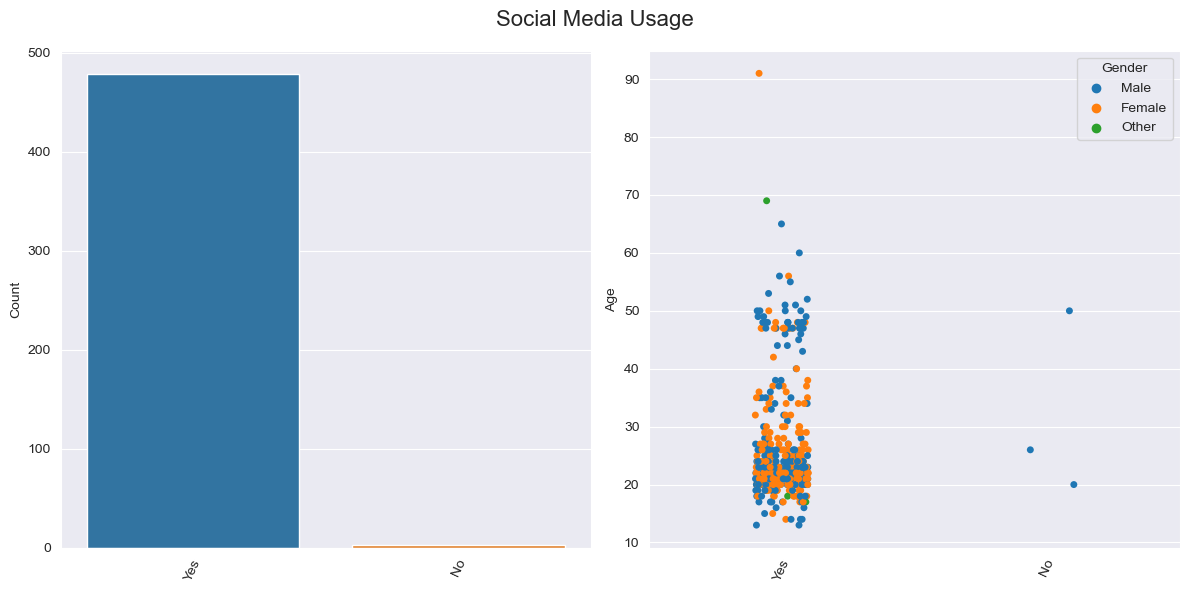

In [188]:
# Bar Plot and Dot Plot for social_media_use column
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.barplot(data=df, x=df['social_media_use'].unique(), y=df['social_media_use'].value_counts(), ax=ax[0])
ax[1] = sns.stripplot(data=df, x=df['social_media_use'], y=df['age'], hue="gender")
ax[1].legend(title="Gender")
fig.suptitle("Social Media Usage", fontsize=16)
ax[0].set_xlabel("")
ax[0].set_ylabel("Count")
ax[1].set_xlabel("")
ax[1].set_ylabel("Age")
ax[0].tick_params(axis='x', rotation=65)
ax[1].tick_params(axis='x', rotation=65)
plt.tight_layout()
# display(df['social_media_use'].unique())
# display(df['social_media_use'].value_counts())

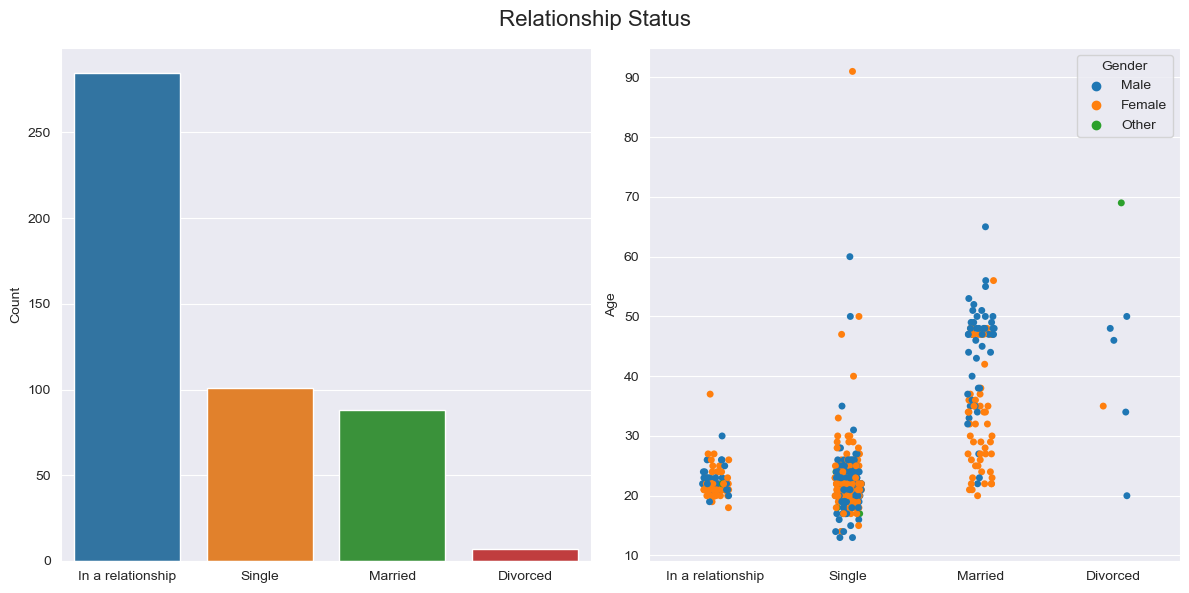

In [189]:
# Bar Plot and Dot Plot for relationship column
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.barplot(data=df, x=df['relationship'].unique(), y=df['relationship'].value_counts(), ax=ax[0])
ax[1] = sns.stripplot(data=df, x=df['relationship'], y=df['age'], hue="gender")
ax[1].legend(title="Gender")
fig.suptitle("Relationship Status", fontsize=16)
ax[0].set_xlabel("")
ax[0].set_ylabel("Count")
ax[1].set_xlabel("")
ax[1].set_ylabel("Age")
plt.tight_layout()

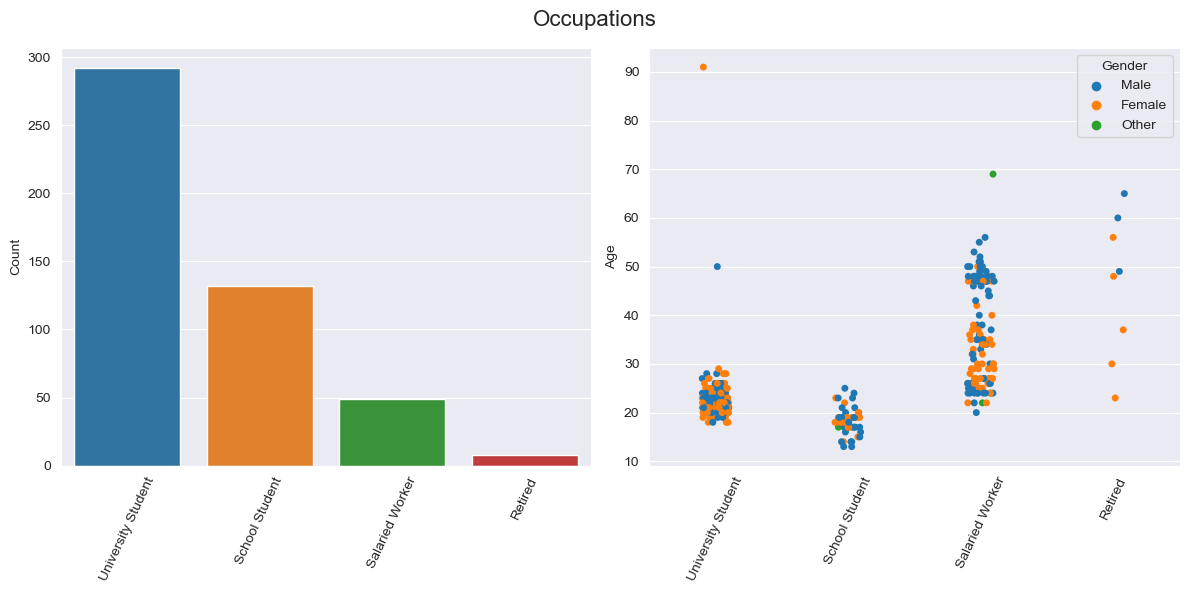

In [190]:
# Bar Plot and Dot Plot for occupation column
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.barplot(data=df, x=df['occupation'].unique(), y=df['occupation'].value_counts(), ax=ax[0])
ax[1] = sns.stripplot(data=df, x=df['occupation'], y=df['age'], hue="gender")
ax[1].legend(title="Gender")
fig.suptitle("Occupations", fontsize=16)
ax[0].set_xlabel("")
ax[0].set_ylabel("Count")
ax[1].set_xlabel("")
ax[1].set_ylabel("Age")
ax[0].tick_params(axis='x', rotation=65)
ax[1].tick_params(axis='x', rotation=65)
plt.tight_layout()

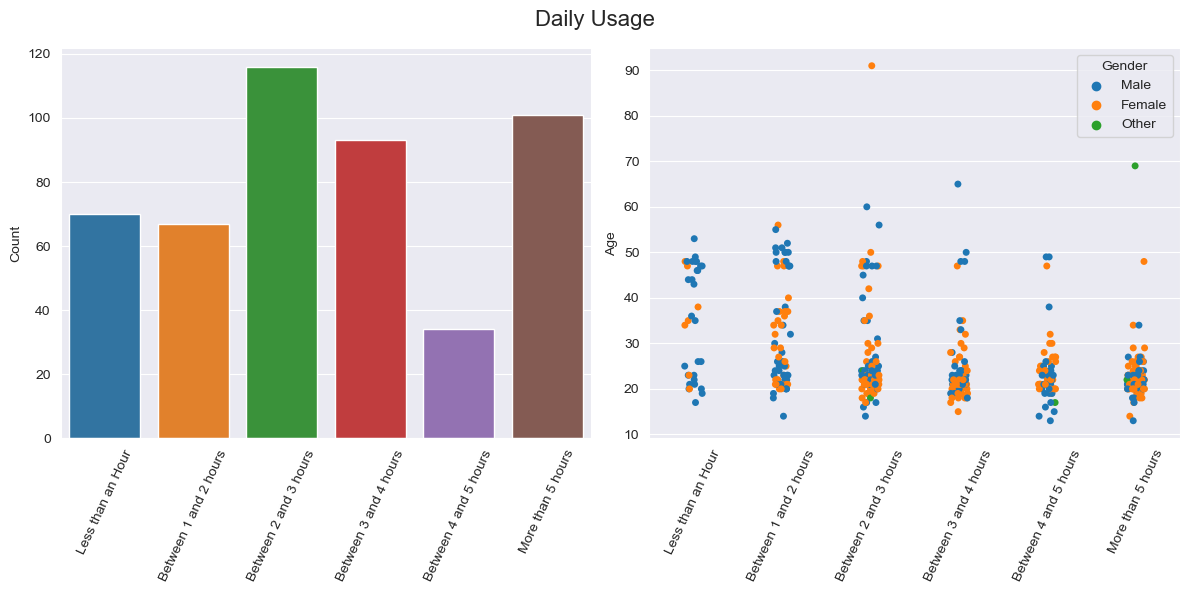

In [191]:
# Bar Plot and Dot Plot for daily_usage column
order_list = ['Less than an Hour', 'Between 1 and 2 hours', 'Between 2 and 3 hours',
         'Between 3 and 4 hours', 'Between 4 and 5 hours', 'More than 5 hours']

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.barplot(data=df, x=df['daily_usage'].unique(), y=df['daily_usage'].value_counts(), ax=ax[0], order=order_list)
ax[1] = sns.stripplot(data=df, x=df['daily_usage'], y=df['age'], hue="gender", order=order_list)
ax[1].legend(title="Gender")
fig.suptitle("Daily Usage", fontsize=16)
ax[0].set_xlabel("")
ax[0].set_ylabel("Count")
ax[1].set_xlabel("")
ax[1].set_ylabel("Age")
ax[0].tick_params(axis='x', rotation=65)
ax[1].tick_params(axis='x', rotation=65)
plt.tight_layout()

In [192]:
# Adding a column for calculating impact on mental health
df['impact_score'] = df.iloc[:, 6:18].sum(axis=1)
df.head()

,age,gender,relationship,occupation,social_media_use,daily_usage,without_purpose,distracted,restless,distracted_ease,worries,concentration,compare_to_others,compare_feelings,validation,depressed,daily_activity_flux,sleeping_issues,impact_score
0,21,Male,In a relationship,University Student,Yes,Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5,43
1,21,Female,Single,University Student,Yes,More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5,43
2,21,Female,Single,University Student,Yes,Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5,35
3,21,Female,Single,University Student,Yes,More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2,35
4,21,Female,Single,University Student,Yes,Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1,44


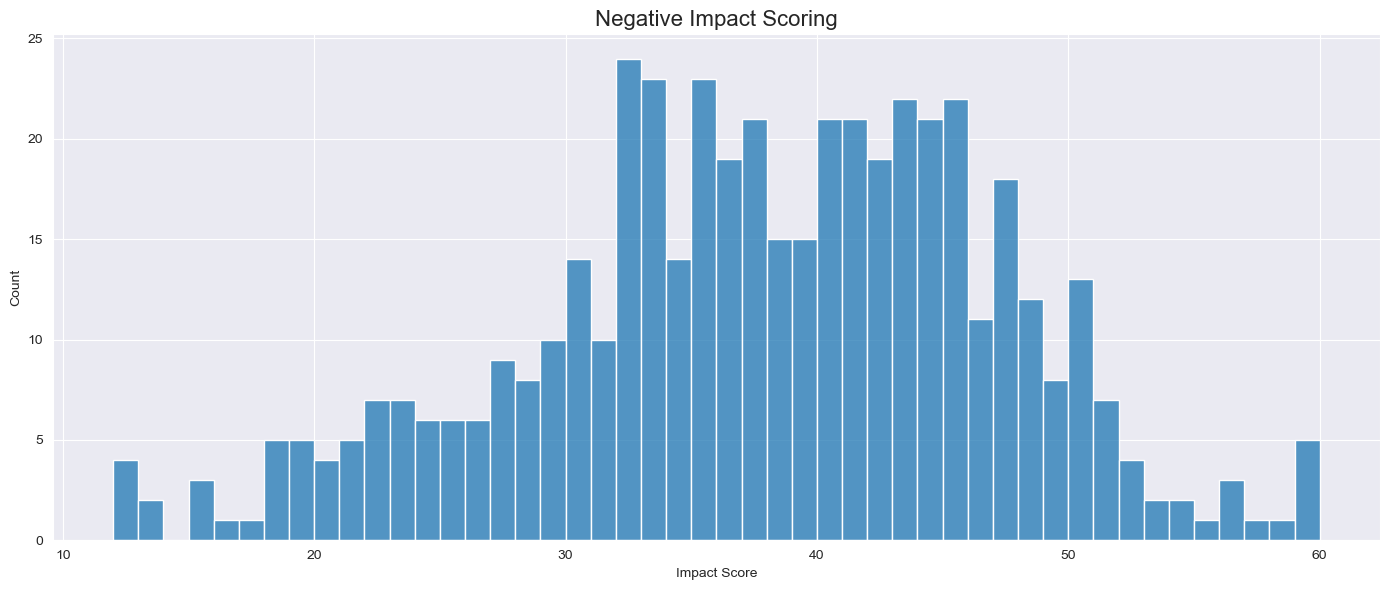

In [193]:
# Histogram Plot for new impact_score column
plt.figure(figsize=(14,6))
ax = sns.histplot(data=df, x="impact_score", bins=48)
ax.set_title("Negative Impact Scoring", fontsize=16)
ax.set(xlabel='Impact Score')
# plt.show()
plt.tight_layout()

In [194]:
# Adding a column for the risk based on impact_score column
df["risk"] = "lower"
df.loc[df[df['impact_score'] >= 37].index, "risk"] = "higher"
df['risk'] = df['risk'].astype("category")

df.head()

,age,gender,relationship,occupation,social_media_use,daily_usage,without_purpose,distracted,restless,distracted_ease,worries,concentration,compare_to_others,compare_feelings,validation,depressed,daily_activity_flux,sleeping_issues,impact_score,risk
0,21,Male,In a relationship,University Student,Yes,Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5,43,higher
1,21,Female,Single,University Student,Yes,More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5,43,higher
2,21,Female,Single,University Student,Yes,Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5,35,lower
3,21,Female,Single,University Student,Yes,More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2,35,lower
4,21,Female,Single,University Student,Yes,Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1,44,higher


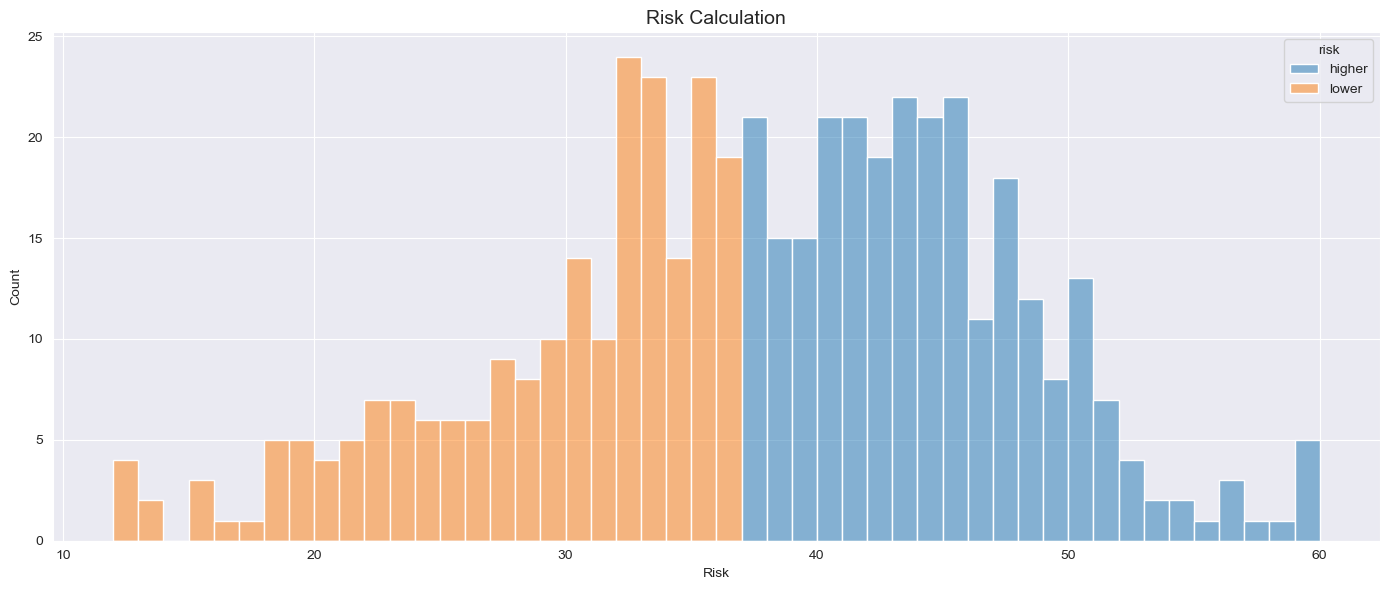

In [195]:
# Histogram Plot for new risk column
plt.figure(figsize=(14,6))
ax = sns.histplot(data=df, x='impact_score', bins=48, hue='risk')
ax.set_title("Risk Calculation", fontsize=14)
ax.set(xlabel='Risk')
# plt.show()
plt.tight_layout()

In [196]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define features and target
# X = df.drop(df.iloc[:, 6:18], axis=1).drop(columns=['risk']) # Features
# y = (df['risk'] == 'higher').astype(int) # Target, 1 = higher, 0 = lower
X = df.iloc[:, 0:6]
y = df['risk']  # Target, 1 = higher, 0 = lower
 
display(X.head())
display(y.head())

# display(X['age'].value_counts())

,age,gender,relationship,occupation,social_media_use,daily_usage
0,21,Male,In a relationship,University Student,Yes,Between 2 and 3 hours
1,21,Female,Single,University Student,Yes,More than 5 hours
2,21,Female,Single,University Student,Yes,Between 3 and 4 hours
3,21,Female,Single,University Student,Yes,More than 5 hours
4,21,Female,Single,University Student,Yes,Between 2 and 3 hours


0    higher
1    higher
2     lower
3     lower
4    higher
Name: risk, dtype: category
Categories (2, object): ['higher', 'lower']

In [197]:
# Splitting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# display(X_train.head())
# display(y_train.head())

# display(X_test.head())
# display(y_test.head())

In [198]:
# Data Preprocessing
numeric_feat = ['age']
nominal_feat = ['gender', 'relationship', 'occupation', 'social_media_use']
ordinal_feat = ['daily_usage']

preprocessor = ColumnTransformer(transformers=[
                ('num', StandardScaler(), numeric_feat),
                ('nominal', OneHotEncoder(), nominal_feat),
                ('ordinal', OrdinalEncoder(), ordinal_feat)]
                                )

Best Parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Random Forest Classifier Report:
              precision    recall  f1-score   support

      higher       0.64      0.60      0.62        58
       lower       0.45      0.49      0.47        39

    accuracy                           0.56        97
   macro avg       0.54      0.55      0.54        97
weighted avg       0.56      0.56      0.56        97



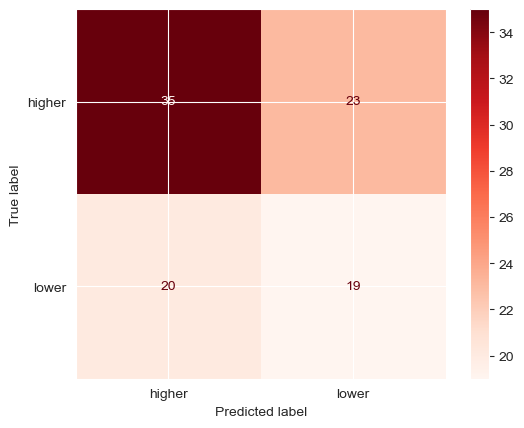

In [199]:
# Random Forest Classifier with GridSearchCV
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

y_pred_rf = grid_search_rf.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap=plt.cm.Reds)

Best Parameters for XGBoost: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
XGBoost Classifier Report:
              precision    recall  f1-score   support

      higher       0.70      0.89      0.78        57
       lower       0.75      0.45      0.56        40

    accuracy                           0.71        97
   macro avg       0.72      0.67      0.67        97
weighted avg       0.72      0.71      0.69        97



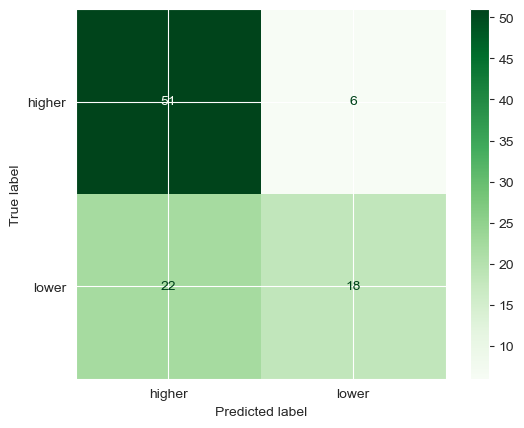

In [200]:
# XGBoost Classifier with GridSearchCV
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(random_state=42))])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

y_pred_xgb = grid_search_xgb.predict(X_test)

y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

print("XGBoost Classifier Report:")
print(classification_report(y_test_decoded, y_pred_xgb_decoded))
ConfusionMatrixDisplay.from_predictions(y_test_decoded, y_pred_xgb_decoded, cmap=plt.cm.Greens)

In [201]:
# Neural Network
X = df.iloc[:, 0:6]
y = df['risk']

In [202]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [203]:
y_onehot = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

numeric_feat = ['age']
nominal_feat = ['gender', 'relationship', 'occupation', 'social_media_use']
ordinal_feat = ['daily_usage']

preprocessor = ColumnTransformer(transformers=[
                ('num', StandardScaler(), numeric_feat),
                ('nominal', OneHotEncoder(), nominal_feat),
                ('ordinal', OrdinalEncoder(), ordinal_feat)]
                                )

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4385 - loss: 1.0067 - val_accuracy: 0.4615 - val_loss: 0.6908
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5209 - loss: 0.7590 - val_accuracy: 0.6154 - val_loss: 0.6985
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5644 - loss: 0.6926 - val_accuracy: 0.6667 - val_loss: 0.6757
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6258 - loss: 0.6494 - val_accuracy: 0.6667 - val_loss: 0.6601
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5931 - loss: 0.6819 - val_accuracy: 0.6923 - val_loss: 0.6481
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6449 - loss: 0.6587 - val_accuracy: 0.6923 - val_loss: 0.6517
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6373 - loss: 0.6180 - val_accuracy: 0.6923 - val_loss: 0.6515
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6505 - loss: 0.6174 - val_accuracy: 0.6667 - val_loss

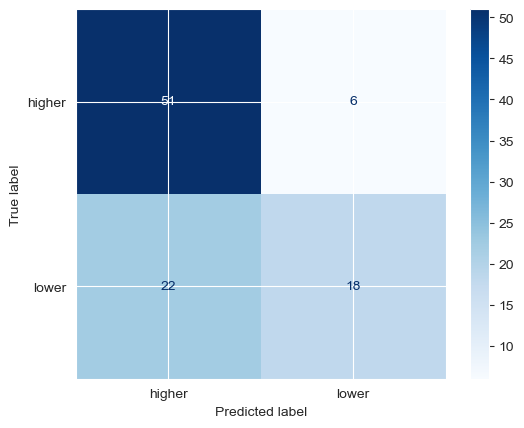

In [204]:
# Build the neural network
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_onehot.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_test_labels = label_encoder.inverse_transform(y_test_classes)

print("Neural Network Classifier Report:")
print(classification_report(y_test_labels, y_pred_labels))
ConfusionMatrixDisplay.from_predictions(y_test_decoded, y_pred_xgb_decoded, cmap=plt.cm.Blues)